# TSAI Assignment 7 - Code 4

### Model4:
###### Target
Reduce the number of model parameters further
(Limit max channels to 32, to further reduce model parameters. Keep the convolutions, but, reducing channel size even further. Use max pooling)
###### Result
Model parameters - 7,790
Train Accuracy - 97.88
Validation Accuracy - 97.64
##### Analysis
Although the accuracy reduded further comparitive to the previous model, it's still decent, noting that model parameters reduced from 26k to 7k

In [1]:
from utils import torch,nn,F,optim,datasets,transforms
import utils

Create Train and test Transforms - use utils module

In [2]:
# Data transformation parameters
mean = 0.1307
std_dev = 0.3081

#Get train data transformation
train_transforms = utils.getTrainTransforms(mean,std_dev)

#Get Test data transformations
test_transforms = utils.getTestTransforms(mean,std_dev)

Get the MNIST data - train dataset and test dataset

In [3]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

Get the train_loader and test_loader -  batches of data used in model training/testing

In [4]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

## MODEL - 4

In [6]:
from models import model_4
myNextModel = model_4.getModel()

In [7]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

optimizer = optim.SGD(myNextModel.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  tr_Acc, tr_loss = utils.train(myNextModel, train_loader, optimizer, criterion)
  tst_acc, tst_loss = utils.test(myNextModel, test_loader, criterion)
  train_acc.append(tr_Acc)
  train_losses.append(tr_loss)
  test_acc.append(tst_acc)
  test_losses.append(tst_loss)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]D:\SRT_Courses\MachineLearning\TSAI\Session7\S7\models\model_4.py:46: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Train: Loss=2.3013 Batch_id=117 Accuracy=10.89: 100%|████████████████████████████████| 118/118 [00:19<00:00,  6.11it/s]


Test set: Average loss: 2.3012, Accuracy: 1135/10000 (11.35%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=2.2971 Batch_id=117 Accuracy=11.24: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.50it/s]


Test set: Average loss: 2.2991, Accuracy: 1135/10000 (11.35%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=1.5642 Batch_id=117 Accuracy=17.90: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.74it/s]


Test set: Average loss: 1.6178, Accuracy: 5150/10000 (51.50%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.2816 Batch_id=117 Accuracy=80.48: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.74it/s]


Test set: Average loss: 0.3098, Accuracy: 9022/10000 (90.22%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.1858 Batch_id=117 Accuracy=92.45: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.78it/s]


Test set: Average loss: 0.1880, Accuracy: 9389/10000 (93.89%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1329 Batch_id=117 Accuracy=94.61: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.91it/s]


Test set: Average loss: 0.1557, Accuracy: 9507/10000 (95.07%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.1957 Batch_id=117 Accuracy=95.69: 100%|████████████████████████████████| 118/118 [00:08<00:00, 14.01it/s]


Test set: Average loss: 0.1268, Accuracy: 9603/10000 (96.03%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0232 Batch_id=117 Accuracy=96.45: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.89it/s]


Test set: Average loss: 0.1297, Accuracy: 9592/10000 (95.92%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.1965 Batch_id=117 Accuracy=97.03: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.60it/s]


Test set: Average loss: 0.0862, Accuracy: 9737/10000 (97.37%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0353 Batch_id=117 Accuracy=97.26: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.22it/s]


Test set: Average loss: 0.0796, Accuracy: 9757/10000 (97.57%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0543 Batch_id=117 Accuracy=97.49: 100%|████████████████████████████████| 118/118 [00:08<00:00, 14.01it/s]


Test set: Average loss: 0.0861, Accuracy: 9730/10000 (97.30%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.1452 Batch_id=117 Accuracy=97.61: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.82it/s]


Test set: Average loss: 0.0705, Accuracy: 9776/10000 (97.76%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0535 Batch_id=117 Accuracy=97.89: 100%|████████████████████████████████| 118/118 [00:08<00:00, 14.02it/s]


Test set: Average loss: 0.0739, Accuracy: 9771/10000 (97.71%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0177 Batch_id=117 Accuracy=97.94: 100%|████████████████████████████████| 118/118 [00:08<00:00, 14.21it/s]


Test set: Average loss: 0.0760, Accuracy: 9754/10000 (97.54%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.1004 Batch_id=117 Accuracy=97.96: 100%|████████████████████████████████| 118/118 [00:08<00:00, 14.19it/s]


Test set: Average loss: 0.0615, Accuracy: 9784/10000 (97.84%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0176 Batch_id=117 Accuracy=98.44: 100%|████████████████████████████████| 118/118 [00:08<00:00, 14.04it/s]


Test set: Average loss: 0.0536, Accuracy: 9834/10000 (98.34%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0230 Batch_id=117 Accuracy=98.54: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.24it/s]


Test set: Average loss: 0.0531, Accuracy: 9836/10000 (98.36%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0779 Batch_id=117 Accuracy=98.56: 100%|████████████████████████████████| 118/118 [00:08<00:00, 14.03it/s]


Test set: Average loss: 0.0543, Accuracy: 9822/10000 (98.22%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0089 Batch_id=117 Accuracy=98.56: 100%|████████████████████████████████| 118/118 [00:08<00:00, 14.06it/s]


Test set: Average loss: 0.0538, Accuracy: 9828/10000 (98.28%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0173 Batch_id=117 Accuracy=98.59: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.97it/s]


Test set: Average loss: 0.0529, Accuracy: 9832/10000 (98.32%)

Adjusting learning rate of group 0 to 1.0000e-03.


Print the model summary to know your model

In [8]:
utils.printModelSummary(myNextModel,(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              40
              ReLU-2            [-1, 4, 26, 26]               0
            Conv2d-3            [-1, 4, 24, 24]             148
              ReLU-4            [-1, 4, 24, 24]               0
         MaxPool2d-5            [-1, 4, 12, 12]               0
            Conv2d-6            [-1, 8, 10, 10]             296
              ReLU-7            [-1, 8, 10, 10]               0
            Conv2d-8              [-1, 8, 8, 8]             584
              ReLU-9              [-1, 8, 8, 8]               0
           Conv2d-10              [-1, 8, 6, 6]             584
             ReLU-11              [-1, 8, 6, 6]               0
           Conv2d-12             [-1, 16, 4, 4]           1,168
             ReLU-13             [-1, 16, 4, 4]               0
           Conv2d-14             [-1, 3

Plot the train and test accuracy

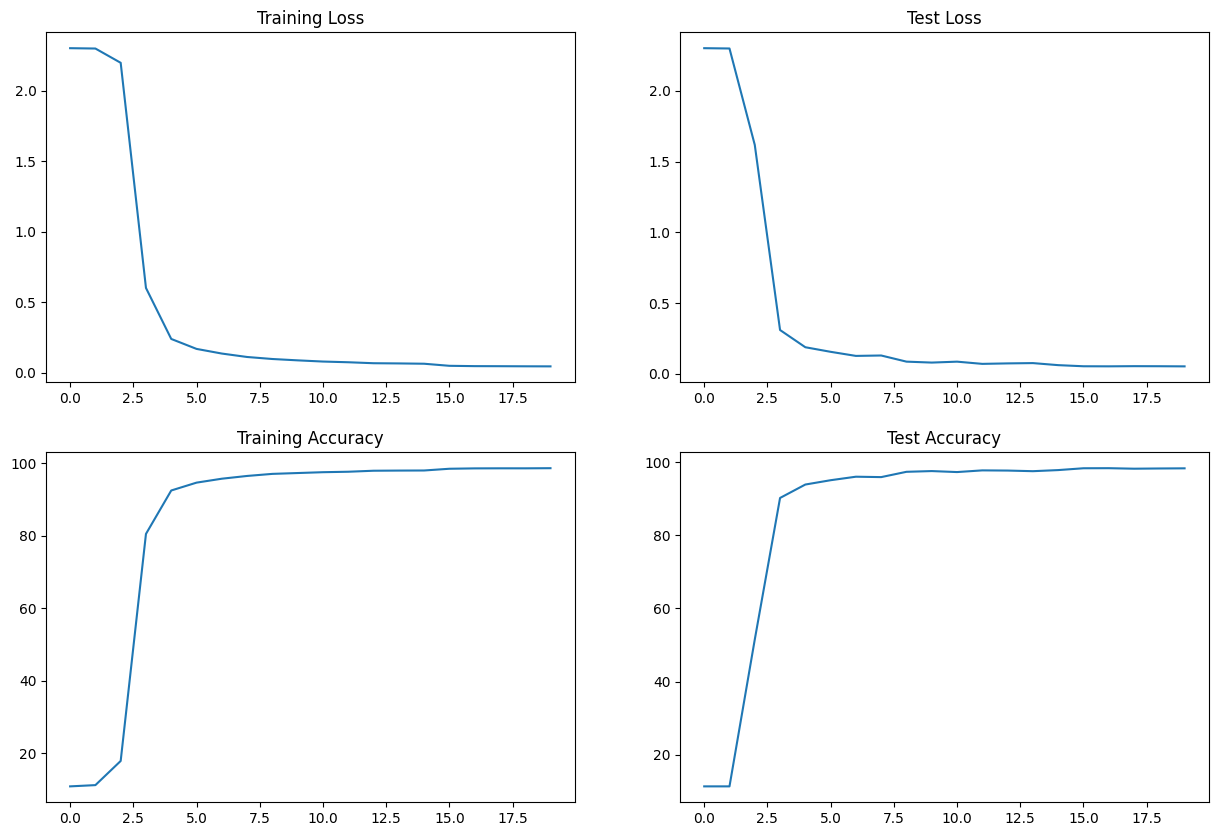

In [9]:
utils.printModelTrainTestAccuracy(train_acc, train_losses, test_acc, test_losses)